## Import 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import pathlib
%cd ..
from config import RAW_DATA_PATH
warnings.filterwarnings('ignore')


c:\Users\hp\Fraud


## Notebook configuration

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Ensures all columns are visible
pd.set_option('display.max_columns', None)


## Load data

In [5]:
df = pd.read_csv(f"{RAW_DATA_PATH}")
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  str    
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  str    
 4   category               1296675 non-null  str    
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  str    
 7   last                   1296675 non-null  str    
 8   gender                 1296675 non-null  str    
 9   street                 1296675 non-null  str    
 10  city                   1296675 non-null  str    
 11  state                  1296675 non-null  str    
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long                   129667

## Class Imbalance

In [13]:
fraud_count = df['is_fraud'].value_counts()
fraud_pct = df['is_fraud'].value_counts(normalize=True) * 100

print("=" * 50)
print("FRAUD STATISTICS")
print("=" * 50)
print(f"Total Transactions: {len(df):,}")
print(f"Legitimate: {fraud_count[0]:,} ({fraud_pct[0]:.2f}%)")
print(f"Fraudulent: {fraud_count[1]:,} ({fraud_pct[1]:.2f}%)")
print(f"Fraud Rate: 1 in {int(1/fraud_pct[1]*100)} transactions")
print("=" * 50)


FRAUD STATISTICS
Total Transactions: 1,296,675
Legitimate: 1,289,169 (99.42%)
Fraudulent: 7,506 (0.58%)
Fraud Rate: 1 in 172 transactions


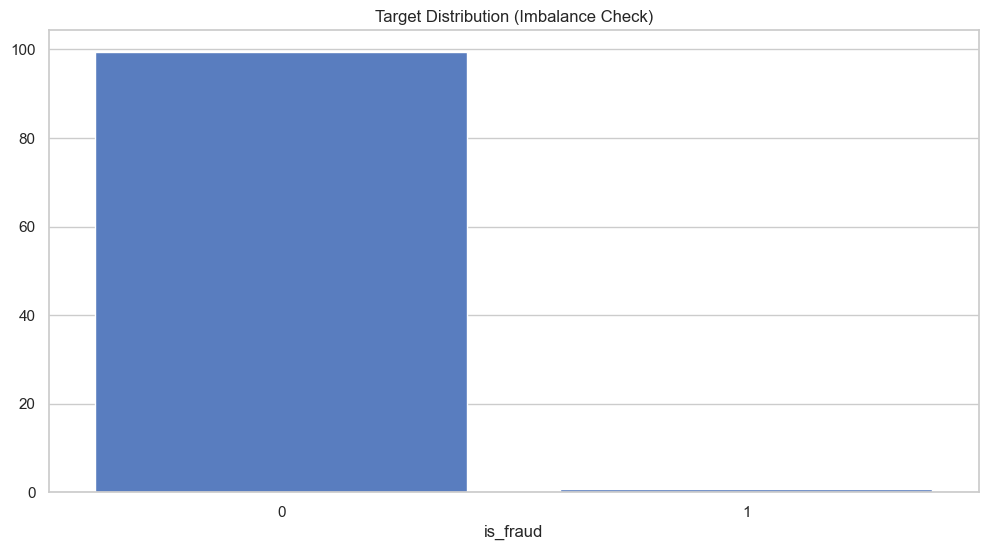

In [18]:
fraud_counts = df['is_fraud'].value_counts(normalize=True) * 100

sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Target Distribution (Imbalance Check)')
plt.show()

## Transaction Hour: Legit vs Fraud

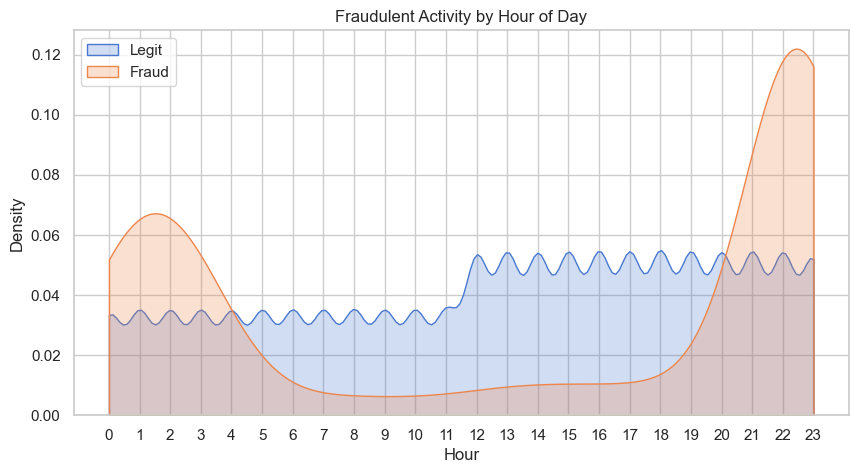

In [8]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour

plt.figure(figsize=(10, 5))

sns.kdeplot(data=df[df['is_fraud']==0], x='hour', label='Legit', fill=True, clip=(0, 23))
sns.kdeplot(data=df[df['is_fraud']==1], x='hour', label='Fraud', fill=True, clip=(0, 23))

plt.title('Fraudulent Activity by Hour of Day')
plt.xticks(range(0, 24))
plt.xlabel('Hour')
plt.legend()
plt.show()

Median Fraud Amt: $396.50
Median Legit Amt: $47.28


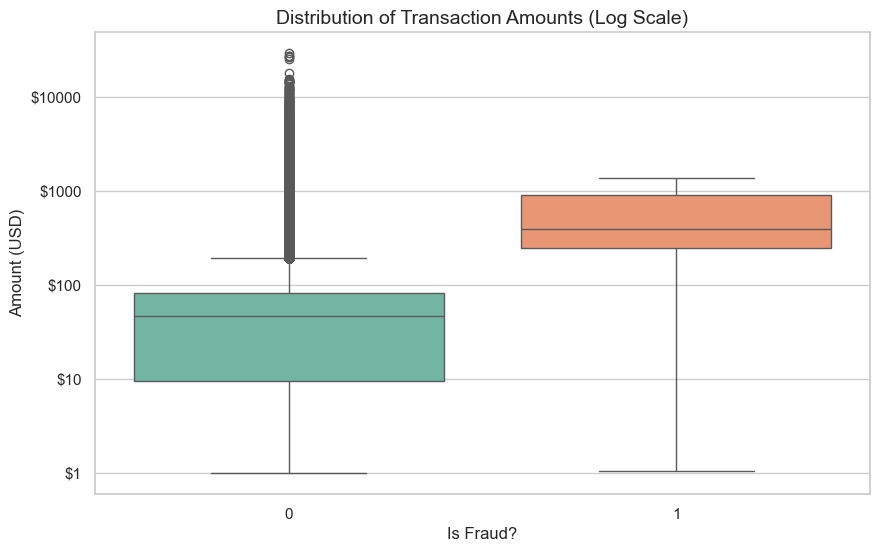

In [10]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))

# Plotting with log_scale=True (Seaborn 0.13+)
ax = sns.boxplot(x='is_fraud', y='amt', data=df, palette='Set2')

# Force log scale on Y
ax.set_yscale('log')

# Better Y-axis labels (e.g., $1, $10, $100...)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%d'))

plt.title('Distribution of Transaction Amounts (Log Scale)', fontsize=14)
plt.xlabel('Is Fraud?', fontsize=12)
plt.ylabel('Amount (USD)', fontsize=12)

# Print precise insights with formatting
med_fraud = df[df['is_fraud']==1]['amt'].median()
med_legit = df[df['is_fraud']==0]['amt'].median()

print(f"{'='*30}")
print(f"Median Fraud Amt: ${med_fraud:,.2f}")
print(f"Median Legit Amt: ${med_legit:,.2f}")
print(f"{'='*30}")

plt.show()

## Fraud rate by Category 

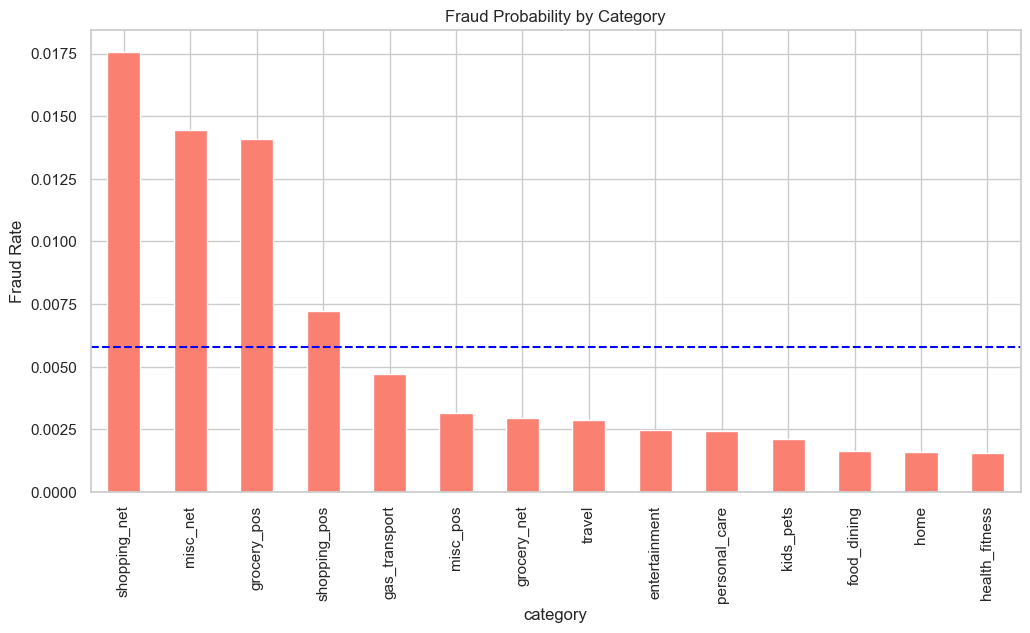

In [ ]:
cat_fraud = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
cat_fraud.plot(kind='bar', color='salmon')
plt.axhline(df['is_fraud'].mean(), color='blue', linestyle='--', label='Global Avg')
plt.title('Fraud Probability by Category')
plt.ylabel('Fraud Rate')
plt.show()

## Fraud Density: Day of Week vs. Hour of Day (% of Total Fraud)

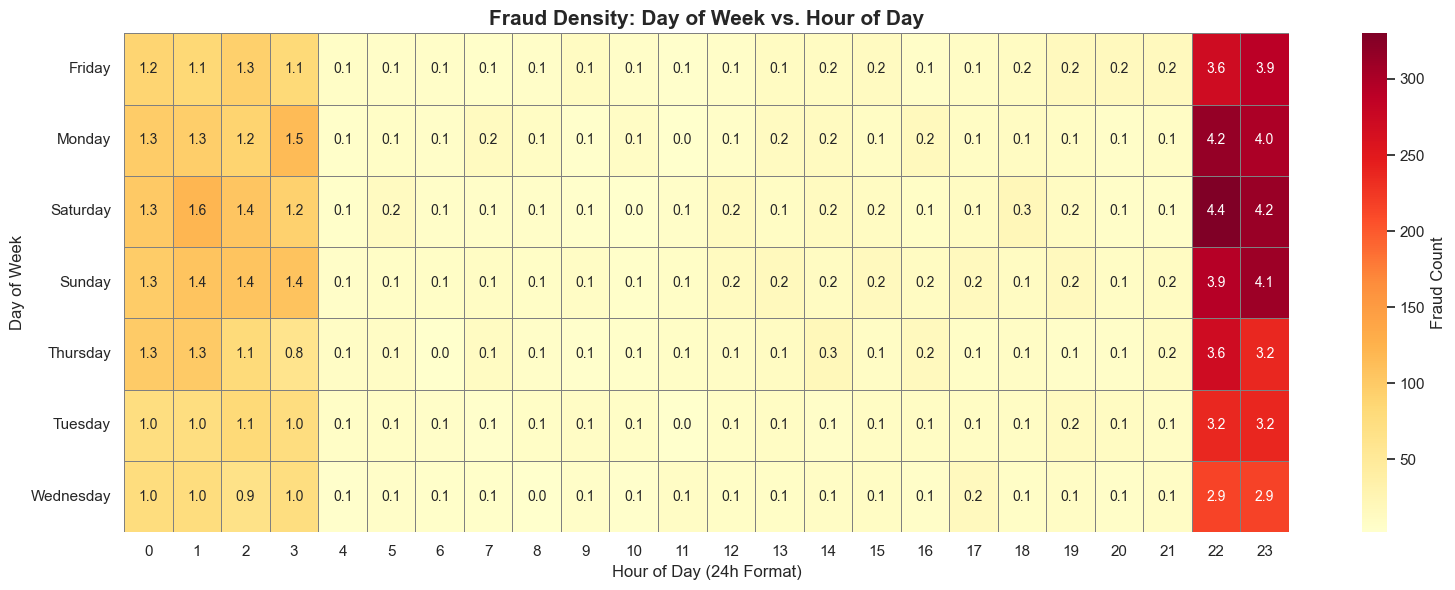

In [9]:
df['day_name'] = df['trans_date_trans_time'].dt.day_name()
# We use .count() or .size() and fill NaNs with 0 for missing fraud hours
fraud_only = df[df['is_fraud'] == 1]
heatmap_data = fraud_only.groupby(['day_name', 'hour']).size().unstack(fill_value=0)

fraud_total = heatmap_data.sum().sum()
fraud_pct = (heatmap_data / fraud_total * 100).round(1)

plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data, 
    cmap='YlOrRd', 
    annot=fraud_pct,  # Show percentages instead of counts
    fmt='.1f',
    cbar_kws={'label': 'Fraud Count'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Fraud Density: Day of Week vs. Hour of Day', fontsize=15, fontweight='bold')
plt.xlabel('Hour of Day (24h Format)', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.show()